# Example ripples and replay raster plot below it

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import subjects
from neuropy import plotting
from neuropy.analyses import Pf1D
sess = subjects.sd.ratSday3[0]

[356, 712, 426, 829]


[]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
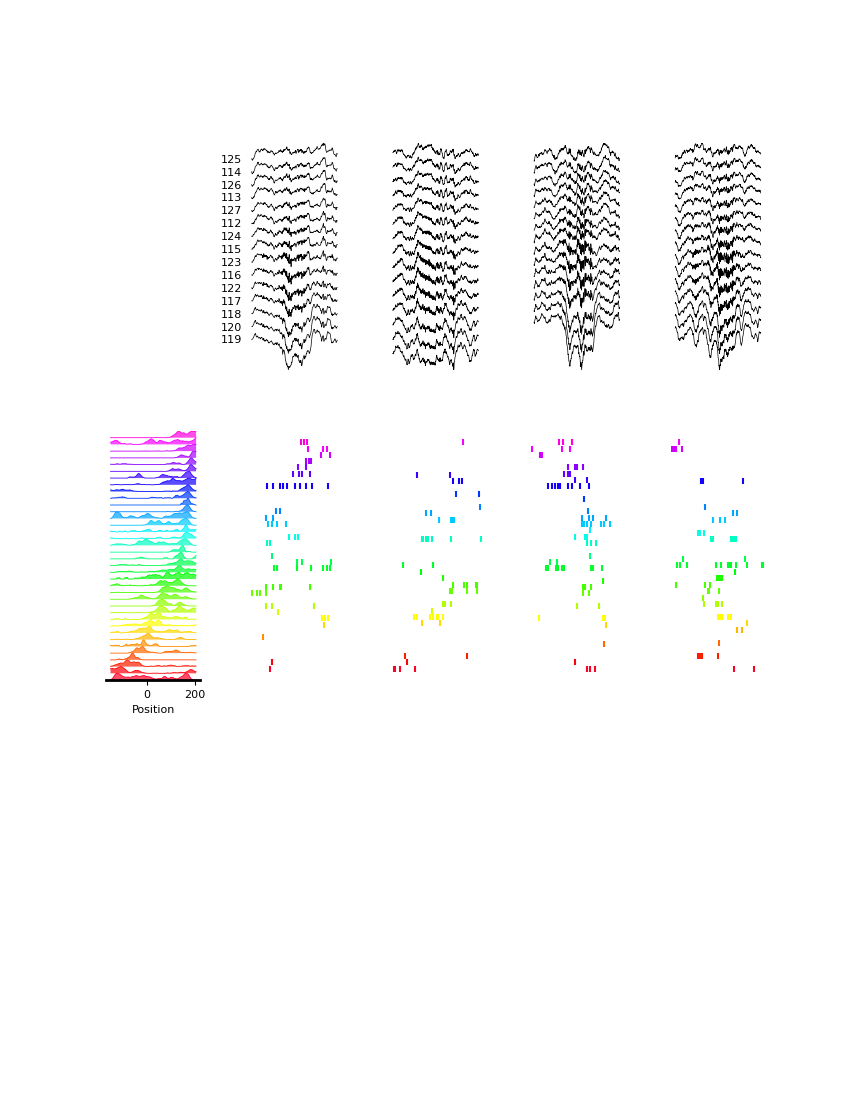

In [4]:
%matplotlib widget
# plt.style.use('dark_background')
figure = plotting.Fig()
fig, gs = figure.draw(grid=(3, 5),wspace=0.5)
maze = sess.paradigm['maze']
rpls = sess.pbe.time_slice(maze[0],maze[1])
channels = sess.probegroup.get_connected_channels()
pyr_neurons = sess.neurons.get_neuron_type('pyr')
pos = sess.lin_maze
# pos.t_start = pos.t_start
run = sess.run['forward']
pf = Pf1D(neurons=pyr_neurons,position=pos,speed_thresh=10,smooth=2,grid_bin=3,frate_thresh=1,epochs=sess.run)
pf_neurons =pyr_neurons.get_by_id(pf.ratemap.neuron_ids) 

tc = pf.ratemap.tuning_curves
sort_ind = np.argsort(np.argmax(tc,axis=1))
pf_neurons = pf_neurons[sort_ind]

# rpl_indx = np.random.choice(len(rpls),4,replace=False)
rpl_indx = [356,712,426,829] # visually identified with random selection runs
print(rpl_indx)
cmap = 'gist_rainbow'
for i,indx in enumerate(rpl_indx):
    ax = plt.subplot(gs[0,i+1])
    rpl = rpls[indx].reshape(-1)
    rpl_sig = sess.eegfile.get_signal(
        channels[8].astype(int), t_start=rpl[0]-0.10, t_stop=rpl[1]+0.1
    )
    plotting.plot_signal_traces(rpl_sig, pad=1,ax=ax,lw=0.5,color='k')
    if i>0:
        ax.set_yticks([])

    neurons = pf_neurons.time_slice(rpl[0],rpl[1])
    ax_raster = plt.subplot(gs[1,i+1])
    ax_raster = plotting.plot_raster(neurons,ax=ax_raster,color=cmap,markersize=4)
 
    ax_raster.axis('off')

ax_pf = plt.subplot(gs[1,0])
plotting.plot_ratemap(pf.ratemap,ax=ax_pf,normalize_tuning_curve=True,cmap=cmap)
ax_pf.set_yticks([])
# figure.savefig(subjects.figpath_sd/'example_ripples_')